## This is the start of the code for the first repo by Anton Kruse

This project aims to get an overlook of perfomances of ETF´s, including a investment strategy & to examine if the choice of my own ETF has been a good one.

We keep it first of simple and use a given "best of" from https://www.etf.com/sections/features-and-news/best-performing-etfs-year. This list shows the best performing ETF within the first half of the year 2022. Due to the market circumstances, this set includes mainly commodity and energy ETF. Since my scope is is to examine my own decision to buy certain ETF, I will and the to this set. Furtmore, the set excludes leveraged and inversed ETF´s. 

In [105]:
# import needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import pandas_datareader.data as web
import datetime
import yfinance as yf
from matplotlib import dates

### How exactly does the plan for this code look like?

Well, first of all required data must be found. Since I could not find any platform which has the power to show me the best performing ETFs over the last 5 years, while only showing the best ETF per sector, I decided to move on differently. The 5 biggest suppliers are: iShares (IS, Blackrock), Amundi,..
On their websites I got information about their 4 biggest ETFs with respect to the Net Assets. Furtmermore, I included the 4 ETFs I personally invest in since several years. The aim is to examine, if my choice has been good or not.

Step 1: loading the data and showing different approaches how to do this.
Step 2: give an overview about the data and the performance
Step 3:

In [78]:
# Step 1 - importing data individually
start = datetime.datetime(2018,1,1)
end = datetime.datetime.today()

ivv_df = web.DataReader('IVV', 'yahoo', start=start, end=end)
iefa_df = web.DataReader('IEFA', 'yahoo', start=start, end=end)
agg_df = web.DataReader('AGG', 'yahoo', start=start, end=end)
ijr_df = web.DataReader('IJR', 'yahoo', start=start, end=end)

# proof that it worked
ivv_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,270.850006,269.369995,269.839996,270.850006,8545200.0,248.559143
2018-01-03,272.630005,270.950012,271.049988,272.420013,3768400.0,249.999985
2018-01-04,274.170013,273.109985,273.230011,273.600006,3394700.0,251.082855
2018-01-05,275.559998,273.980011,274.549988,275.329987,4150500.0,252.670334
2018-01-08,276.109985,274.989990,275.369995,275.940002,2881800.0,253.230225


In [79]:
# Step 1 - importing data by defining a function that loads the required data
def get_stock(ticker):
    data = yf.download(f"{ticker}",start,end)
    data[f'{ticker}'] = data["Close"]
    data = data[[f'{ticker}']] 
    return data

ivv = get_stock('IVV')
ivv.head()

[*********************100%***********************]  1 of 1 completed


,IVV
Date,
2018-01-02,270.850006
2018-01-03,272.420013
2018-01-04,273.600006
2018-01-05,275.329987
2018-01-08,275.940002


In [80]:
# Step 1 - importing data by defining a for loop that gets the tickers from a list
ticker = ['IVV', 'IEFA', 'AGG', 'IJR']
data = pd.DataFrame(columns=ticker)

for i in ticker:
    data[i] = yf.download(i, start, end)['Adj Close']
    
data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,IVV,IEFA,AGG,IJR
Date,,,,
2018-01-02,248.559189,57.914585,97.577934,72.191895
2018-01-03,249.999954,58.297379,97.586884,72.126587
2018-01-04,251.082764,58.871563,97.524307,72.322502
2018-01-05,252.670395,59.176060,97.461746,72.630348
2018-01-08,253.230240,59.132568,97.434898,72.742294


Conclusion Step 1: Usually, only on price is used. In real world, that is the adjusted closing time. Therefore it makes sense to us this directly. Technique 1 and 2 are obviously more complicated or need more lines of code, while technique 3 gives everything required in one data frame immediatly. For that reason, we keep moving with the 'data' including the adjusted close price for the four ETFs provided by iShares.

### Plan for Step 2:
1. Descriptive statistic
2. Plot absolute & relative change over time
3. Show key facts for every ETF

In [118]:
# Step 2- descriptive statistic of the data set
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
IVV,1216.0,332.227511,72.359895,214.954956,266.493958,311.477753,403.710480,474.319031
IEFA,1216.0,60.216119,7.419763,40.191471,55.325443,57.912292,66.681267,75.184052
AGG,1216.0,105.323737,6.768196,93.629997,98.670544,106.189598,112.071743,114.788979
IJR,1216.0,85.190654,16.448690,47.154121,72.912029,79.564213,102.939606,118.389343


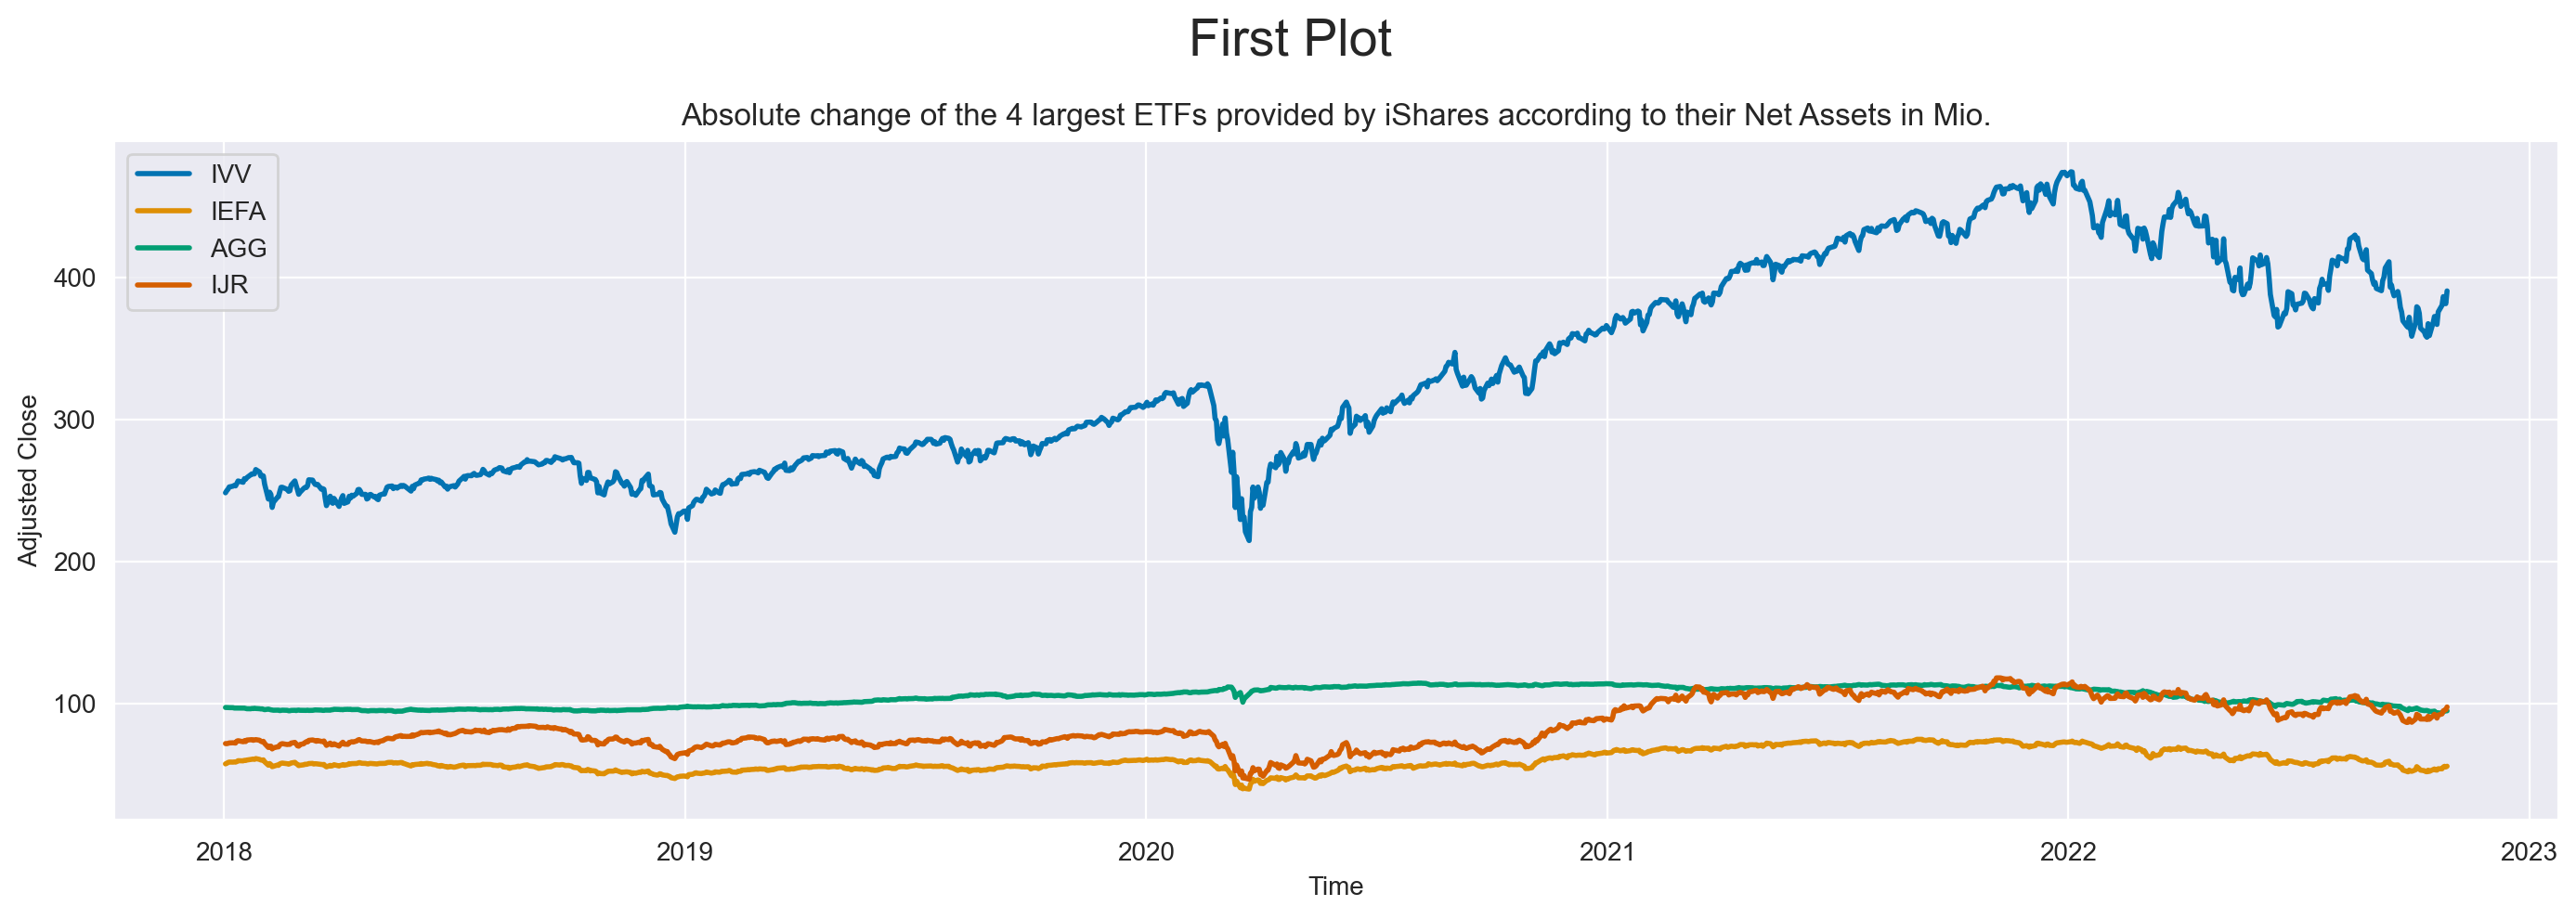

In [113]:
# plotting the absolute change over time for the data
# set style
sns.set_style('darkgrid')
sns.set_palette('colorblind')

fig, ax = plt.subplots(figsize=(14,5), dpi=200)

ax.plot(data['IVV'], label="IVV", lw=2)
ax.plot(data['IEFA'], label="IEFA", lw=2)
ax.plot(data['AGG'], label="AGG",lw=2)
ax.plot(data['IJR'], label="IJR",lw=2)

ax.set_xlabel('Time')
ax.set_ylabel('Adjusted Close')
ax.set_title('Absolute change of the 4 largest ETFs provided by iShares according to their Net Assets in Mio.')
fig.suptitle('First Plot', fontsize=20)

ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y"))
ax.tick_params(axis="x", which="major",rotation=0, pad=5)


plt.tight_layout()
plt.legend()
plt.show();

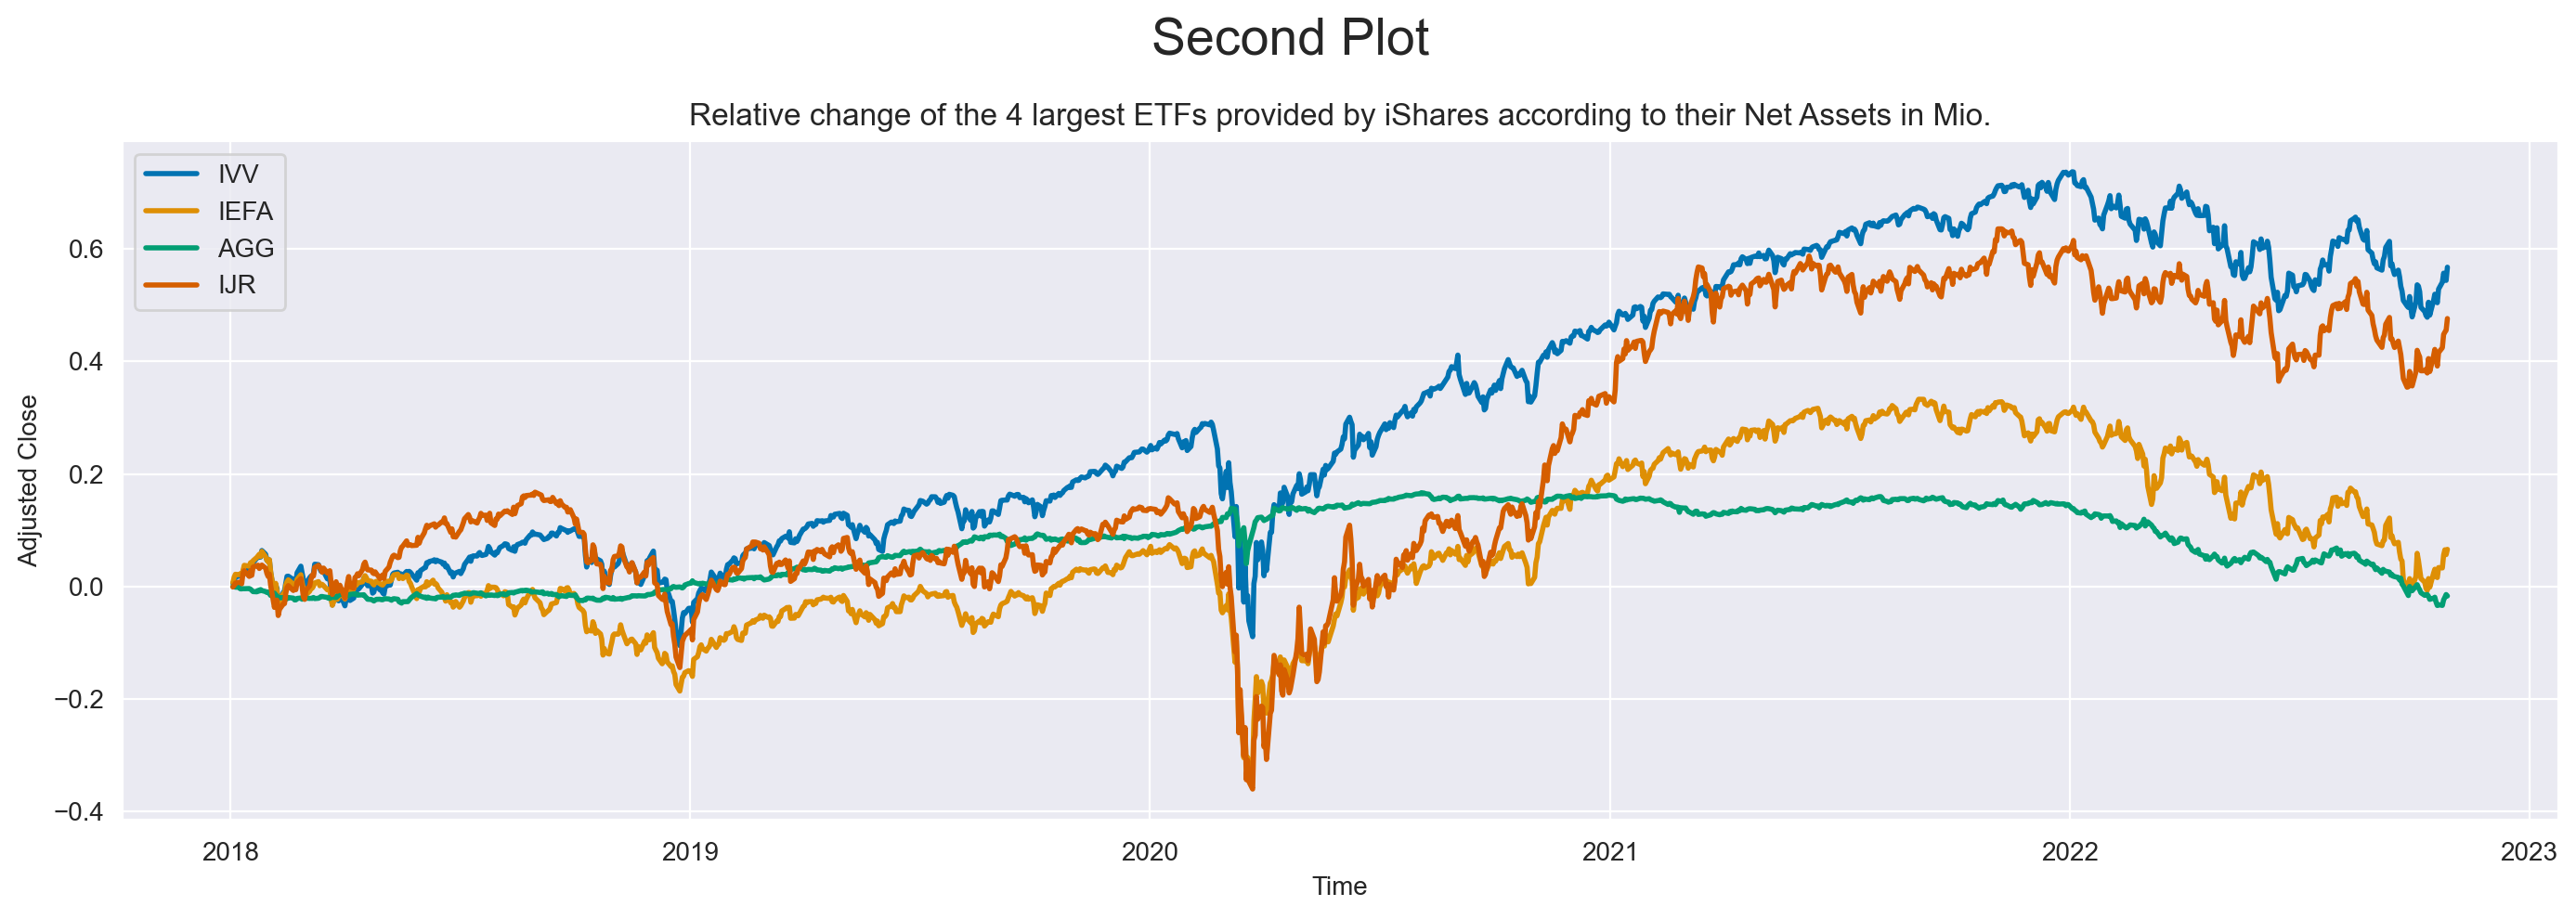

In [122]:
# to compare the change of assets over time, a common approach is to normalize the values
ivv_rel = ivv_df["Adj Close"].pct_change().cumsum()
iefa_rel = iefa_df["Adj Close"].pct_change().cumsum()
agg_rel = agg_df["Adj Close"].pct_change().cumsum()
ijr_rel = ijr_df["Adj Close"].pct_change().cumsum()

sns.set_style('darkgrid')
sns.set_palette('colorblind')

fig, ax = plt.subplots(figsize=(14,5), dpi=200)

ax.plot(ivv_rel, label="IVV", lw=2)
ax.plot(iefa_rel, label="IEFA", lw=2)
ax.plot(agg_rel, label="AGG",lw=2)
ax.plot(ijr_rel, label="IJR",lw=2)

ax.set_xlabel('Time')
ax.set_ylabel('Adjusted Close')
ax.set_title('Relative change of the 4 largest ETFs provided by iShares according to their Net Assets in Mio.')
fig.suptitle('Second Plot', fontsize=20)

ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y"))
ax.tick_params(axis="x", which="major",rotation=0, pad=5)


plt.tight_layout()
plt.legend()
plt.show();

In [136]:
# Step 2 - show the key fact for every ETF
ivv_ticker = yf.Ticker('IVV')
display(ivv_ticker.institutional_holders)
display(ivv_ticker.major_holders)

,0,1
0,Net Assets,268.45B
1,NAV,390.67
2,PE Ratio (TTM),2.80
3,Yield,1.72%
4,YTD Daily Total Return,-19.11%
5,Beta (5Y Monthly),1.00
6,Expense Ratio (net),0.03%
7,Inception Date,2000-05-15


Now, since the best performing ETFs provided by iShares have been examined, my own ETFs will be loaded.

In [210]:
start = datetime.datetime(2018,1,1)
end = datetime.datetime.today()

antons_ticker = ['URTH', 'AEEM.PA', 'IUHE.AS', 'ICOM.L']
antons_data = pd.DataFrame(columns=antons_ticker)

for i in antons_ticker:
    antons_data[i] = yf.download(i, start, end)['Adj Close']
    antons_data.fillna(0.0000)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


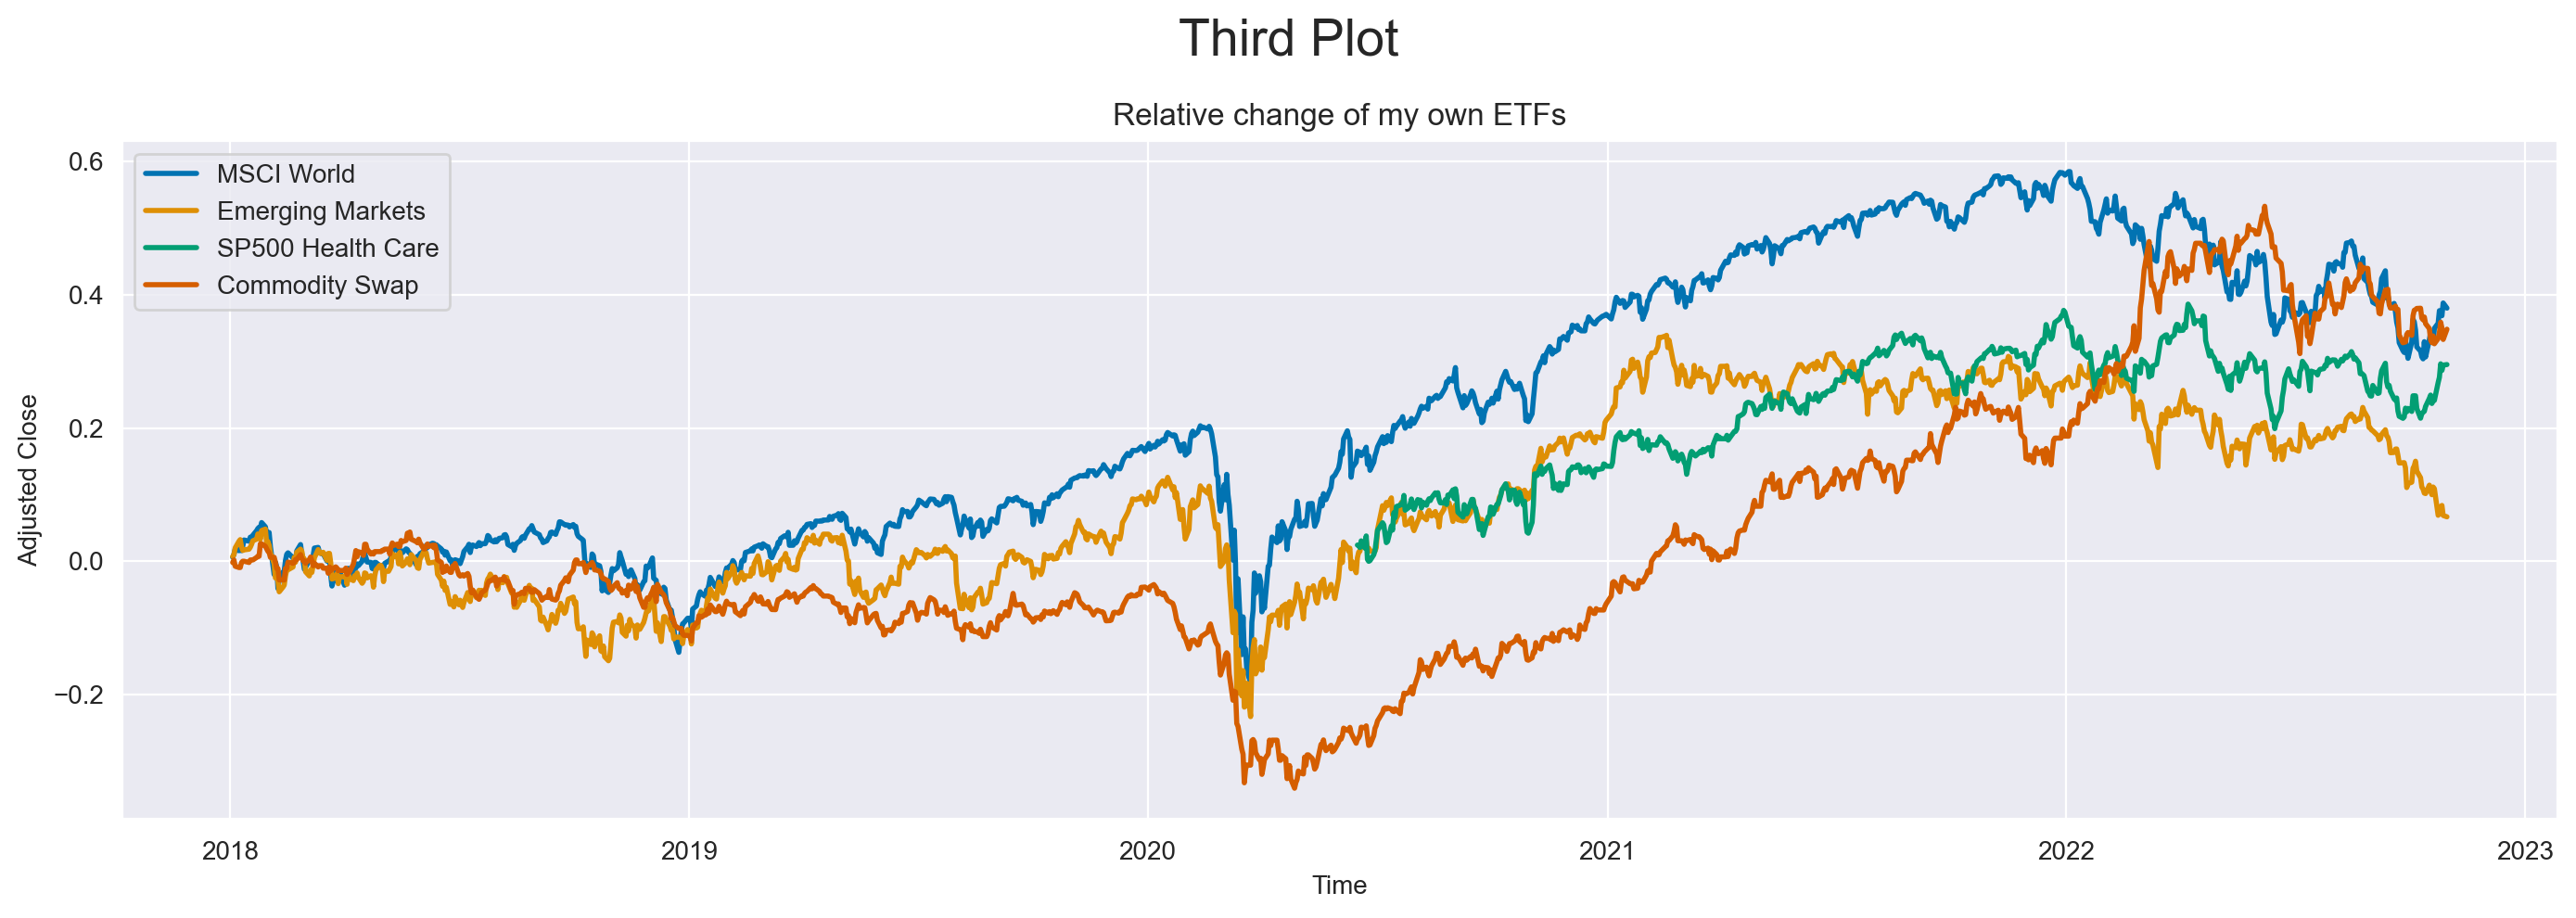

Date
2018-01-02       NaN
2018-01-03       NaN
2018-01-04       NaN
2018-01-05       NaN
2018-01-08       NaN
               ...  
2022-10-25    6.3873
2022-10-26    6.5166
2022-10-27    6.4521
2022-10-28    6.5035
2022-10-31    6.5090
Name: IUHE.AS, Length: 1217, dtype: float64

In [214]:
world_rel = antons_data['URTH'].pct_change().cumsum()
em_rel = antons_data['AEEM.PA'].pct_change().cumsum()
sp500_hc_rel = antons_data['IUHE.AS'].pct_change().cumsum()
comm_swap_rel = antons_data['ICOM.L'].pct_change().cumsum()

# plot the relative change of my own assets
sns.set_style('darkgrid')
sns.set_palette('colorblind')

fig, ax = plt.subplots(figsize=(14,5), dpi=200)

ax.plot(world_rel, label="MSCI World", lw=2)
ax.plot(em_rel, label="Emerging Markets", lw=2)
ax.plot(sp500_hc_rel, label="SP500 Health Care",lw=2)
ax.plot(comm_swap_rel, label="Commodity Swap",lw=2)

ax.set_xlabel('Time')
ax.set_ylabel('Adjusted Close')
ax.set_title('Relative change of my own ETFs')
fig.suptitle('Third Plot', fontsize=20)

ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y"))
ax.tick_params(axis="x", which="major",rotation=0, pad=5)


plt.tight_layout()
plt.legend()
plt.show();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


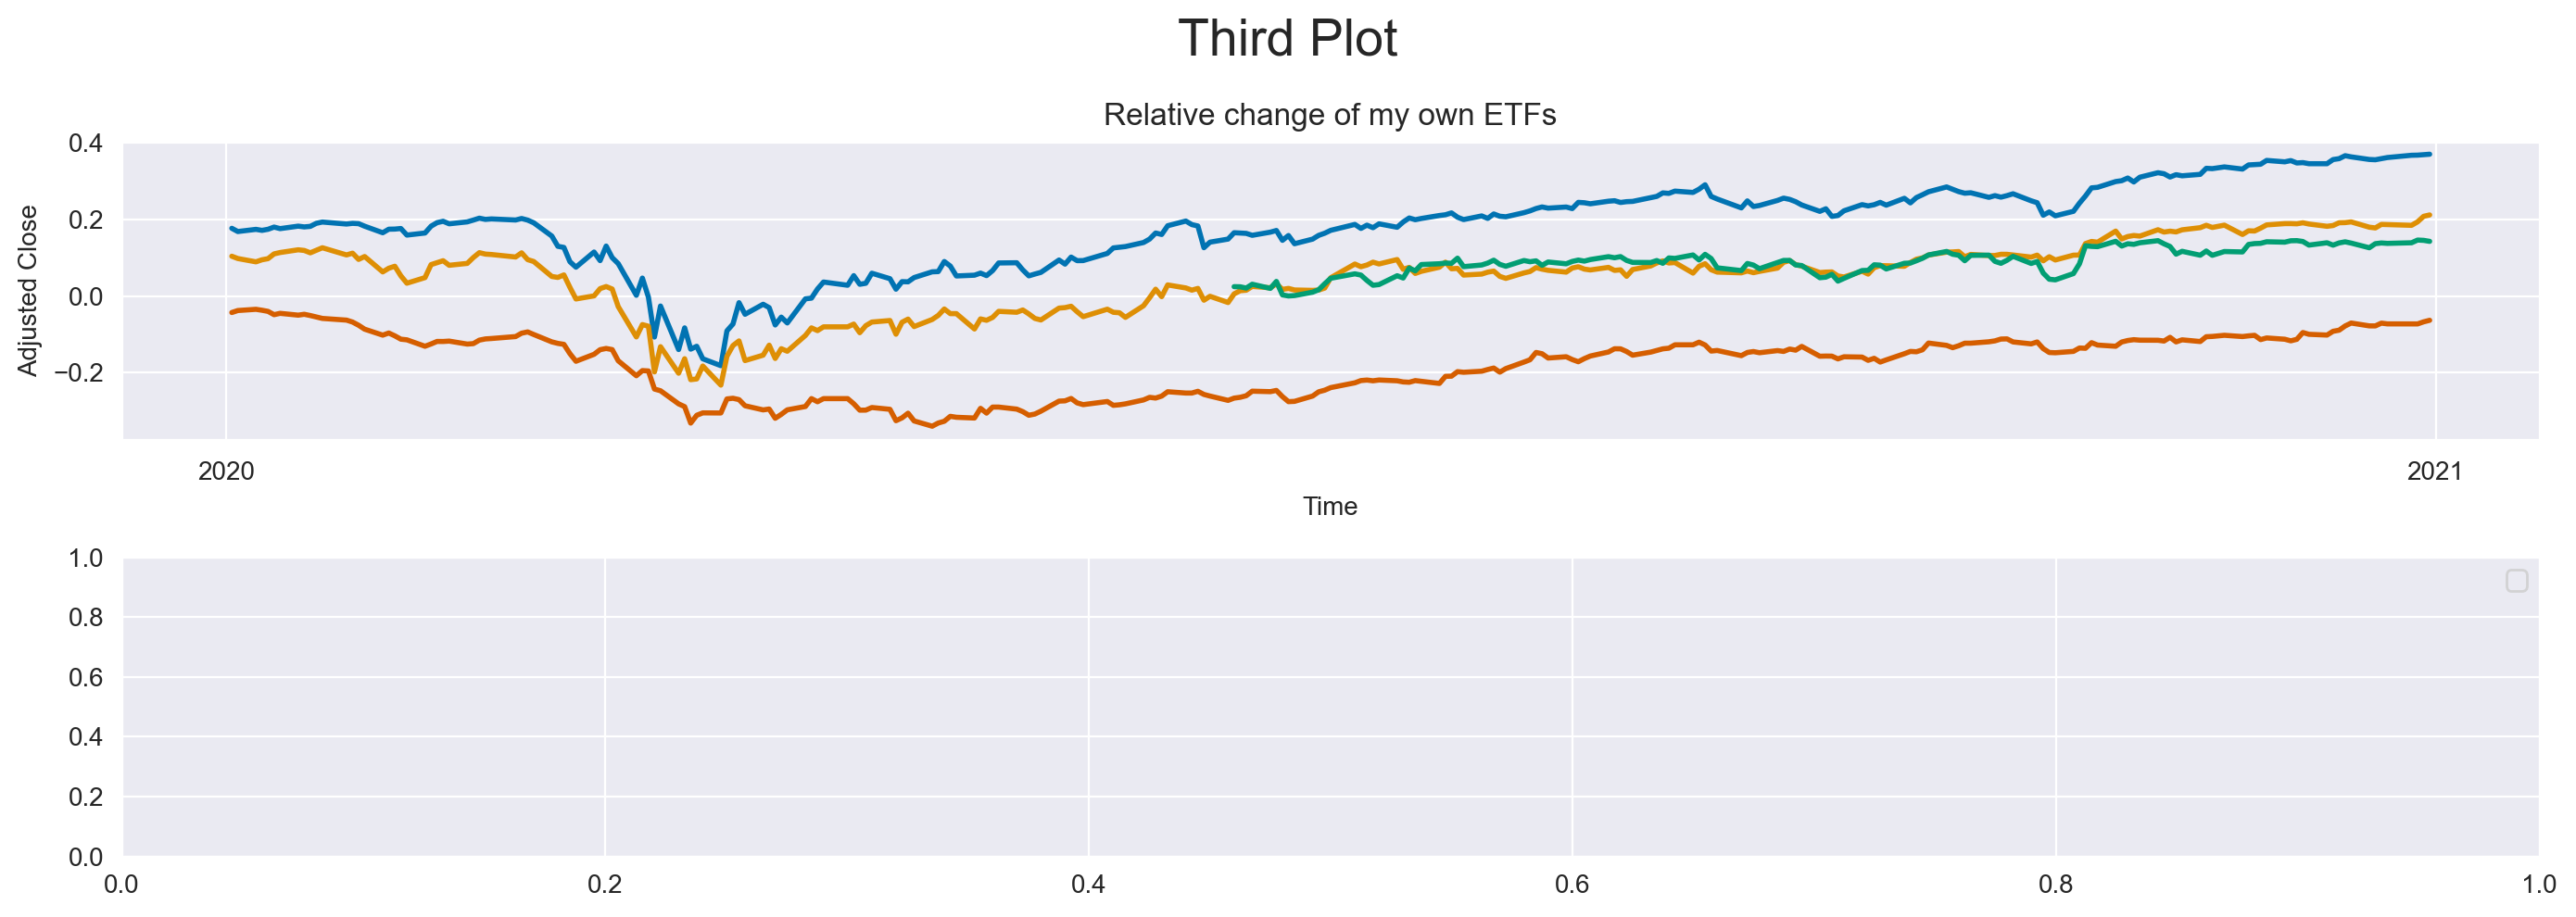

In [222]:
# I want to emphasize the development of the ETFs during a recent crises, e.g. Covid & U-R-war
# plot the relative change of my own assets
sns.set_style('darkgrid')
sns.set_palette('colorblind')

fig, ax = plt.subplots(figsize=(14,5), dpi=200, nrows=2)

ax[0].plot(world_rel["2020-01-01":"2021-01-01"], label="MSCI World", lw=2)
ax[0].plot(em_rel["2020-01-01":"2021-01-01"], label="Emerging Markets", lw=2)
ax[0].plot(sp500_hc_rel["2020-01-01":"2021-01-01"], label="SP500 Health Care",lw=2)
ax[0].plot(comm_swap_rel["2020-01-01":"2021-01-01"], label="Commodity Swap",lw=2)

ax[0].set_xlabel('Time')
ax[0].set_ylabel('Adjusted Close')
ax[0].set_title('Relative change of my own ETFs')
fig.suptitle('Third Plot', fontsize=20)

ax[0].xaxis.set_major_locator(dates.YearLocator())
ax[0].xaxis.set_major_formatter(dates.DateFormatter("%Y"))
ax[0].tick_params(axis="x", which="major",rotation=0, pad=5)


plt.tight_layout()
plt.legend()
plt.show();
